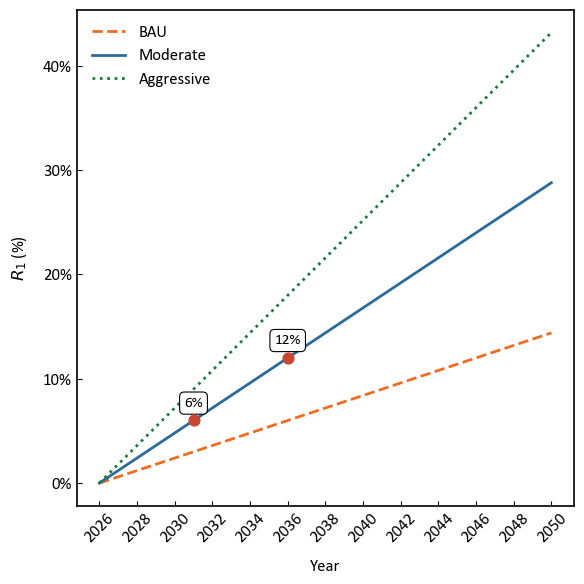

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the data
years = list(range(2026, 2051))
moderate = [1.2 * (year - 2026) for year in years]
bau = [0.5 * m for m in moderate]
aggressive = [1.5 * m for m in moderate]

# Plot settings for an academic look
plt.rcParams['font.family'] = 'calibri'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'



# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot lines with varied linestyles and thicker linewidths
ax.plot(years, bau, label='BAU', color='#f16c23', linestyle='--', linewidth=2)
ax.plot(years, moderate, label='Moderate', color='#2b6a99', linestyle='-', linewidth=2)
ax.plot(years, aggressive, label='Aggressive', color='#1b7c3d', linestyle=':', linewidth=2)

# Grid
ax.grid(False)
# ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight points on Moderate
highlight_points = {2031: 6, 2036: 12}
for x, y in highlight_points.items():
    ax.scatter(x, y, s=60, zorder=5, color='#c94633')
    ax.annotate(f'{y}%', (x, y),
                textcoords="offset points", xytext=(0, 10), ha='center',
                fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.8))

# Format y-axis as percentages
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: f'{val:.0f}%'))

# Labels and formatting
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel(r'$R_1$ (%)', labelpad=10)
# ax.set_title('BAU vs Moderate vs Aggressive Trajectories')
ax.legend(frameon=False, loc='upper left')
ax.set_xticks(years[::2])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


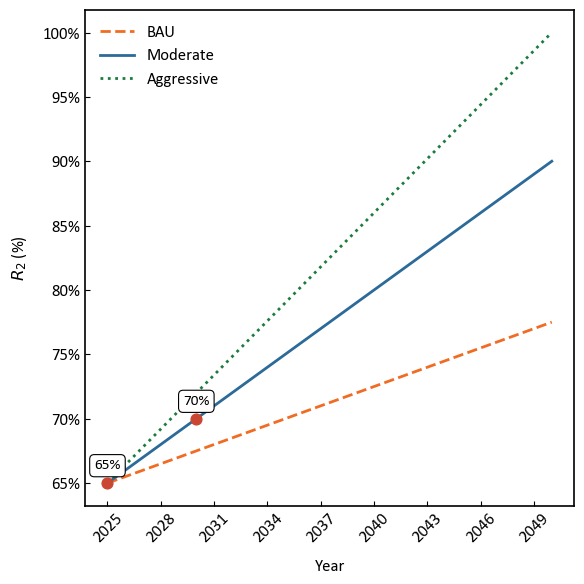

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data setup
years = list(range(2025, 2051))
# Moderate trajectory: 65% in 2025 to 70% in 2030 => 1%/yr
moderate = [65 + 1 * (year - 2025) for year in years]
bau = [65 + 0.5 * (year - 2025) for year in years]            # 0.5%/yr slower
aggressive = [65 + 1.4 * (year - 2025) for year in years]      # 1.4%/yr faster

# Clip to 100%
moderate = [min(val, 100) for val in moderate]
bau = [min(val, 100) for val in bau]
aggressive = [min(val, 100) for val in aggressive]

# Academic style settings
plt.rcParams['font.family'] = 'calibri'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.grid'] = False

fig, ax = plt.subplots(figsize=(6, 6))

# Plot lines
ax.plot(years, bau, label='BAU', color='#f16c23', linestyle='--', linewidth=2)
ax.plot(years, moderate, label='Moderate', color='#2b6a99', linestyle='-', linewidth=2)
ax.plot(years, aggressive, label='Aggressive', color='#1b7c3d', linestyle=':', linewidth=2)

# Highlight moderate points
highlight = {2025: 65, 2030: 70}
for x, y in highlight.items():
    ax.scatter(x, y, s=60, zorder=5, color='#c94633')
    ax.annotate(f'{y}%', xy=(x, y),
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=11,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.8))

# Percentage y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, _: f'{int(v)}%'))

# Labels and legend
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel(r'$R_2$ (%)', labelpad=10)
# ax.set_title(r'Projected $R_2$ Trajectories: BAU, Moderate & Aggressive', pad=15)
ax.legend(frameon=False, loc='upper left')

# Ticks
ax.set_xticks(years[::3])
plt.xticks(rotation=45)

# Light grid for reference
ax.grid(False)

plt.tight_layout()
plt.show()


In [3]:
from pathlib import Path
import pandas as pd

def make_scenario_df(years, offsets, caps=None):
    """
    Build a DataFrame of BAU, Moderate, and Aggressive trajectories.
    
    - years: iterable of ints
    - offsets: dict with keys 'bau', 'moderate', 'aggressive', each a function(year_index)->value
    - caps: optional dict of max values per column
    """
    data = {'Year': list(years)}
    for name, func in offsets.items():
        vals = [func(i, year) for i, year in enumerate(years)]
        if caps and name in caps:
            vals = [min(v, caps[name]) for v in vals]
        data[name.capitalize()] = vals
    return pd.DataFrame(data)


# Define the two scenario specs:
specs = {
    'R1_scenarios.csv': {
        'years': range(2026, 2051),
        'offsets': {
            'bau':      lambda i, y: 0.5 * (1.2 * i),
            'moderate': lambda i, y:     1.2 * i,
            'aggressive': lambda i, y: 1.5 * (1.2 * i),
        },
        'caps': None
    },
    'R2_scenarios.csv': {
        'years': range(2025, 2051),
        'offsets': {
            'bau':        lambda i, y: 65 + 0.5 * i,
            'moderate':   lambda i, y: 65 + 1.0 * i,
            'aggressive': lambda i, y: 65 + 1.4 * i,
        },
        'caps': {'bau': 100, 'moderate': 100, 'aggressive': 100}
    }
}

# Base path is the folder containing this notebook/script
base_path = Path(__file__).parent if "__file__" in globals() else Path().cwd()
results_dir = base_path / 'results'

# (no need to create if it already exists)
results_dir.mkdir(exist_ok=True)

# Generate & save each
for filename, spec in specs.items():
    df = make_scenario_df(spec['years'], spec['offsets'], spec.get('caps'))
    out_path = results_dir / filename
    df.to_csv(out_path, index=False)
    print(f"Saved {out_path}")


Saved e:\MSc_LCA\C_XIAO_MSc_IE_Thesis\results\R1_scenarios.csv
Saved e:\MSc_LCA\C_XIAO_MSc_IE_Thesis\results\R2_scenarios.csv
